1. Data Loading and Preprocessing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('../DataTransformation/last_final_data.csv')

# Check for missing values
print(data.isnull().sum())

# Define features and target
X = data.drop('mean_salary', axis=1)
y = data['mean_salary']

# Categorical and numerical features
categorical_features = ['city', 'company_size', 'position', 'level', 'office', 'hybrid', 'remote']
numerical_features = ['experience', 'raise_period', 'JavaScript / TypeScript and related frameworks',
                      'C# / .NET', 'Java and related frameworks', 'Python', 'PHP', 'C, C++', 
                      'Kotlin', 'Swift', 'Golang', 'Flutter']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


city                                              0
company_size                                      0
position                                          0
level                                             0
experience                                        0
raise_period                                      0
office                                            0
hybrid                                            0
remote                                            0
mean_salary                                       0
JavaScript / TypeScript and related frameworks    0
C# / .NET                                         0
Java and related frameworks                       0
Python                                            0
PHP                                               0
C, C++                                            0
Kotlin                                            0
Swift                                             0
Golang                                            0
Flutter     

2. Model Training and Evaluation

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f'{name} - MAE: {mean_absolute_error(y_test, y_pred)}, MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}')

# Choose the best model (for example, Random Forest)
best_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])
best_model.fit(X_train, y_train)


Linear Regression - MAE: 2310.529940268163, MSE: 110720328.67264722, R2: -0.027321764582479258
Random Forest - MAE: 1670.5678419364701, MSE: 123146835.2911594, R2: -0.14262146482695282


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['experience', 'raise_period',
                                                   'JavaScript / TypeScript '
                                                   'and related frameworks',
                                                   'C# / .NET',
                                                   'Java and related '
                                                   'frameworks',
                                                   'Python', 'PHP', 'C, C++',
                                                   'Kotlin', 'Swift', 'Golang',
                                                   'Flutter']),
                                                 ('cat', OneHotEncoder(),
                                                  ['city', 'company_size',
                                                   'position', 'level',
                                                   'office', 'hybrid',
                                                   'remote'])])),
                ('model', RandomForestRegressor(random_state=42))])

             experience  mean_salary
experience     1.000000     0.119156
mean_salary    0.119156     1.000000


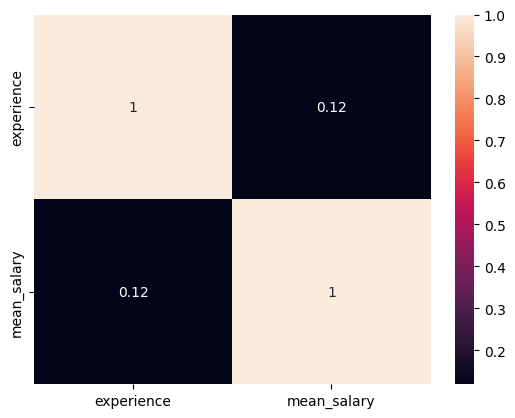

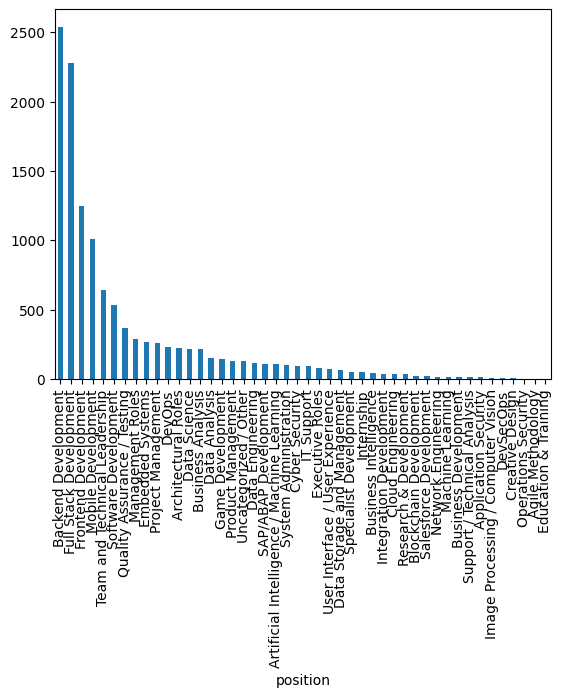

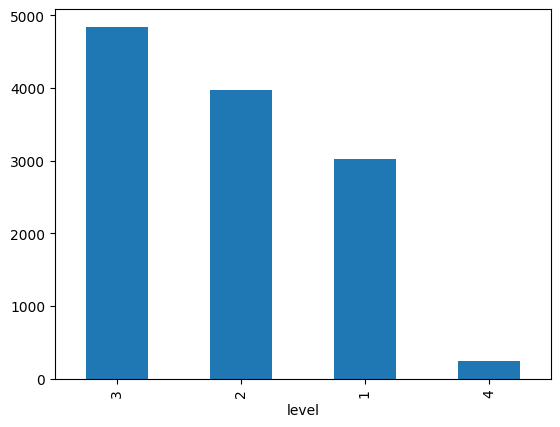

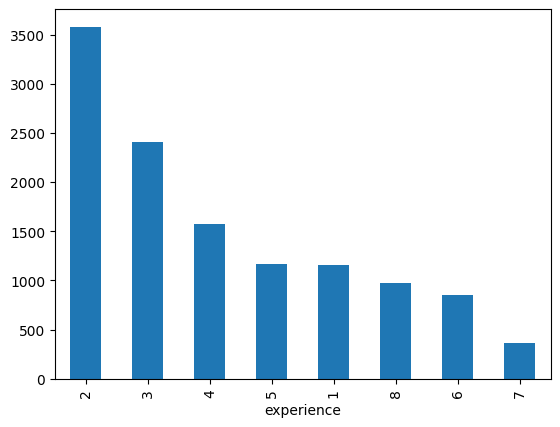

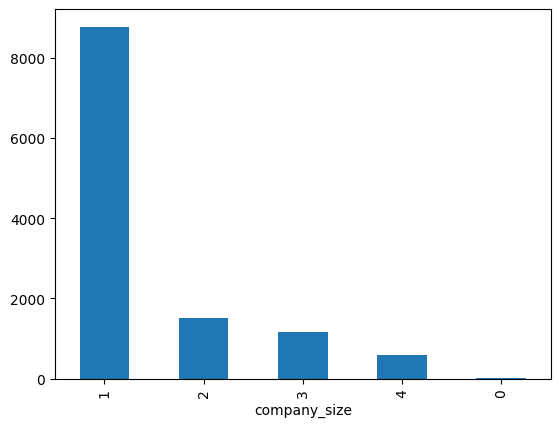

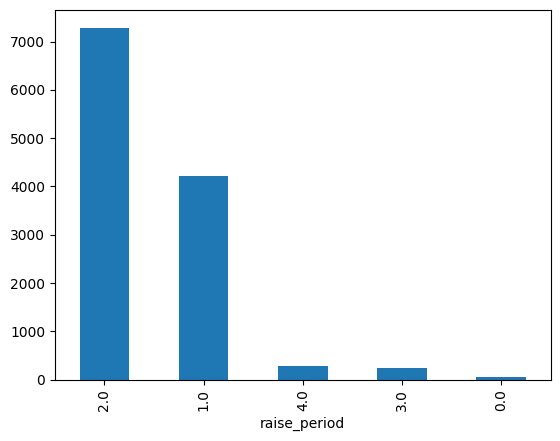

In [22]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the data (replace 'your_data.csv' with the actual file path)
data = pd.read_csv('../DataTransformation/last_final_data.csv')
data.dropna(how="any", inplace=True)

# Separate features (X) and target (Y)
X = data.drop(columns=['mean_salary'])
Y = data['mean_salary']
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
corr = data[["experience","mean_salary"]].corr()

print(corr)

sns.heatmap(corr,annot=True)
plt.show()


data['position'].value_counts().plot(kind="bar")
plt.show()

data['level'].value_counts().plot(kind="bar")
plt.show()

data['experience'].value_counts().plot(kind="bar")
plt.show()

data['company_size'].value_counts().plot(kind="bar")
plt.show()

data['raise_period'].value_counts().plot(kind="bar")
plt.show()



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the data
data = pd.read_csv('../DataTransformation/last_final_data.csv')


# Define features and target
X = data.drop('mean_salary', axis=1)
y = data['mean_salary']

# Categorical and numerical features
categorical_features = ['city', 'company_size', 'position', 'level', 'office', 'hybrid', 'remote']
numerical_features = ['experience', 'raise_period', 'JavaScript / TypeScript and related frameworks',
                      'C# / .NET', 'Java and related frameworks', 'Python', 'PHP', 'C, C++', 
                      'Kotlin', 'Swift', 'Golang', 'Flutter']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Basic Gradient Boosting Model
basic_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor(random_state=42))])
basic_model.fit(X_train, y_train)
y_pred_basic = basic_model.predict(X_test)

print('Basic Gradient Boosting - MAE:', mean_absolute_error(y_test, y_pred_basic))
print('Basic Gradient Boosting - MSE:', mean_squared_error(y_test, y_pred_basic))
print('Basic Gradient Boosting - R²:', r2_score(y_test, y_pred_basic))


Basic Gradient Boosting - MAE: 1578.5659648109927
Basic Gradient Boosting - MSE: 94814202.79211116
Basic Gradient Boosting - R²: 0.12026368339406923


In [16]:
# Gradient Boosting Regressor with GridSearchCV
model = Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor(random_state=42))])

# Parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}

# GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best parameters and score
print('Best parameters found:', grid_search.best_params_)
print('Best CV MAE:', -grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
print('Improved MAE:', mean_absolute_error(y_test, y_pred))
print('Improved MSE:', mean_squared_error(y_test, y_pred))
print('Improved R²:', r2_score(y_test, y_pred))


Best parameters found: {'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 300}
Best CV MAE: 1533.8653029923973
Improved MAE: 1403.5961583374885
Improved MSE: 106788431.54337734
Improved R²: 0.009160456391962168


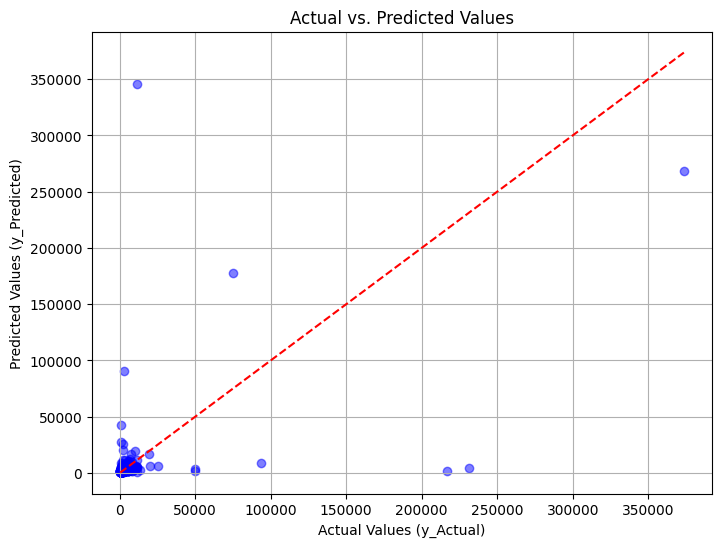

In [23]:
#compare actual and predicted values using a plot
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel("Actual Values (y_Actual)")
plt.ylabel("Predicted Values (y_Predicted)")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()

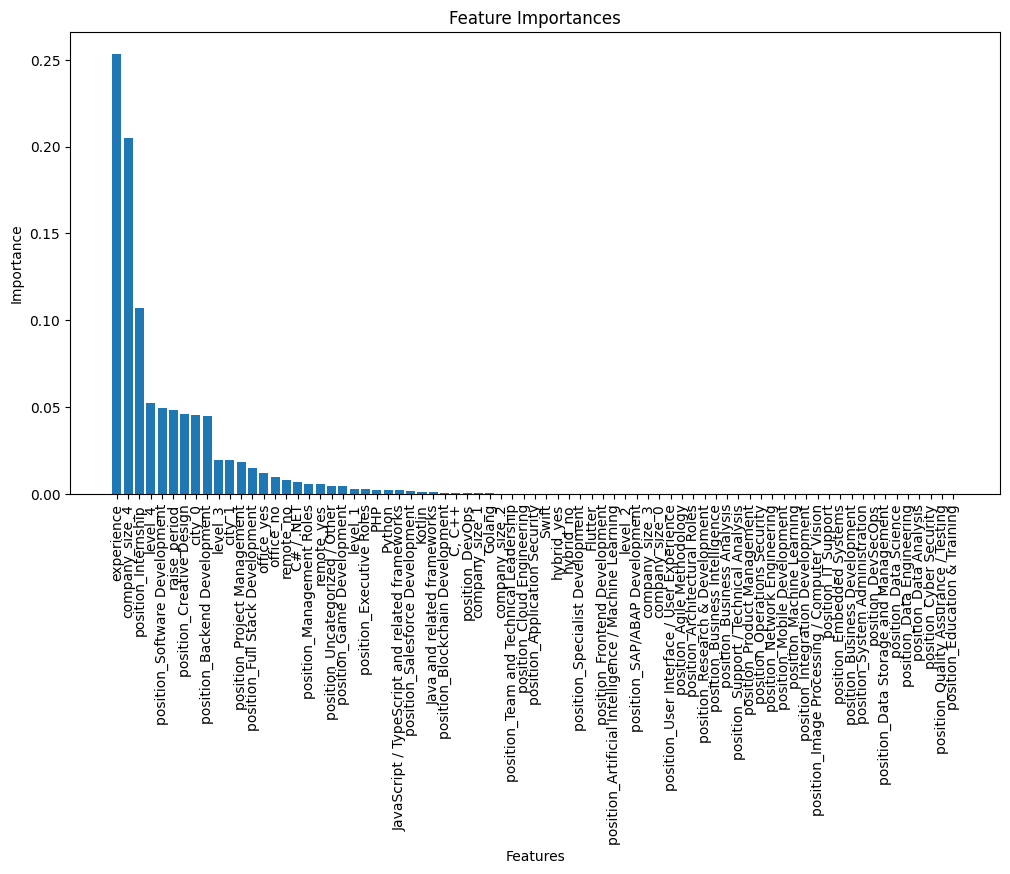

In [21]:
# Feature importance
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
importances = best_model.named_steps['model'].feature_importances_
features = numerical_features + list(best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

